# EDA – Pakistan Air Quality Dataset

This notebook performs Exploratory Data Analysis (EDA) on the **raw** Pakistan
Air Quality datasets for 5 cities:

- Islamabad  
- Lahore  
- Karachi  
- Peshawar  
- Quetta  

We will:
- inspect the schema and data types  
- check missing values and error codes (`-200`)  
- look at distributions of pollutants (PM2.5, NO2, CO)  
- analyse time-series behaviour (daily averages)  
- compare pollution levels across cities  

Raw files are expected in: `data/raw/city/`.


In [5]:
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path(r"C:\Users\Admin\OneDrive\Documents\mlopsproject")
RAW_CITY_DIR = PROJECT_ROOT / "data" / "raw" / "city"

PROJECT_ROOT, RAW_CITY_DIR


(WindowsPath('C:/Users/Admin/OneDrive/Documents/mlopsproject'),
 WindowsPath('C:/Users/Admin/OneDrive/Documents/mlopsproject/data/raw/city'))

In [3]:
list(RAW_CITY_DIR.iterdir())


[WindowsPath('C:/Users/Admin/OneDrive/Documents/mlopsproject/data/raw/city/islamabad_complete_data.xlsx'),
 WindowsPath('C:/Users/Admin/OneDrive/Documents/mlopsproject/data/raw/city/karachi_complete_data.xlsx'),
 WindowsPath('C:/Users/Admin/OneDrive/Documents/mlopsproject/data/raw/city/lahore_complete_data.xlsx'),
 WindowsPath('C:/Users/Admin/OneDrive/Documents/mlopsproject/data/raw/city/peshawar_complete_data.csv'),
 WindowsPath('C:/Users/Admin/OneDrive/Documents/mlopsproject/data/raw/city/quetta_complete_data.csv')]

Helper to load a city

In [17]:
def load_city_df(city_name: str, filename: str) -> pd.DataFrame:
    """
    Load a single city air-quality file from data/raw/city.
    Handles CSV + XLSX.
    Handles mixed datetime formats.
    """
    path = RAW_CITY_DIR / filename
    if not path.exists():
        raise FileNotFoundError(f"{path} not found. Check file name and location.")

    # load file
    if path.suffix.lower() == ".xlsx":
        df = pd.read_excel(path)
    else:
        df = pd.read_csv(path)

    # fix weird datetime formats
    df["datetime"] = pd.to_datetime(
        df["datetime"],
        format="mixed",      
        dayfirst=True,        
        errors="coerce"
    )

    # add city column
    df["city"] = city_name

    return df



city_files = {
    "islamabad": "islamabad_complete_data.xlsx",
    "karachi": "karachi_complete_data.xlsx",
    "lahore": "lahore_complete_data.xlsx",
    "peshawar": "peshawar_complete_data.csv",
    "quetta": "quetta_complete_data.csv",
}
city_files


{'islamabad': 'islamabad_complete_data.xlsx',
 'karachi': 'karachi_complete_data.xlsx',
 'lahore': 'lahore_complete_data.xlsx',
 'peshawar': 'peshawar_complete_data.csv',
 'quetta': 'quetta_complete_data.csv'}

Loading Islamabad as example

In [18]:
df_isb = load_city_df("islamabad", city_files["islamabad"])

df_isb.head()


,datetime,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,surface_pressure,wind_speed_10m,wind_direction_10m,shortwave_radiation,city
0,2021-08-24 00:00:00,5,1228.33,0.00,27.76,40.41,6.02,66.96,87.07,14.69,29.7,55,19.7,0.0,943.4,10.5,74,0,islamabad
1,2021-08-24 01:00:00,5,1134.87,0.00,24.33,46.49,6.20,64.50,82.37,14.57,29.4,56,19.7,0.0,943.2,10.8,92,0,islamabad
2,2021-08-24 02:00:00,5,1361.85,0.94,39.41,30.76,6.91,64.21,80.38,16.21,28.9,58,19.8,0.0,943.0,10.1,107,0,islamabad
3,2021-08-24 03:00:00,5,1682.28,8.38,51.41,27.18,9.06,64.75,79.55,17.73,28.4,60,19.8,0.0,942.8,10.5,106,0,islamabad
4,2021-08-24 04:00:00,5,1054.76,3.07,27.08,91.55,21.70,59.86,71.18,13.30,28.1,62,20.1,0.0,942.9,9.4,97,0,islamabad


Info / structure

In [19]:
df_isb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28245 entries, 0 to 28244
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              28245 non-null  datetime64[ns]
 1   main.aqi              28245 non-null  int64         
 2   components.co         28245 non-null  float64       
 3   components.no         28245 non-null  float64       
 4   components.no2        28245 non-null  float64       
 5   components.o3         28245 non-null  float64       
 6   components.so2        28245 non-null  float64       
 7   components.pm2_5      28245 non-null  float64       
 8   components.pm10       28245 non-null  float64       
 9   components.nh3        28245 non-null  float64       
 10  temperature_2m        28245 non-null  float64       
 11  relative_humidity_2m  28245 non-null  int64         
 12  dew_point_2m          28245 non-null  float64       
 13  precipitation   

Basic stats

In [20]:
df_isb.describe(include="all").T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
datetime,28245,NaN,NaN,NaN,2023-04-12 22:36:48.178438400,2021-08-24 00:00:00,2022-06-16 05:00:00,2023-04-14 10:00:00,2024-02-06 16:00:00,2024-12-01 00:00:00,NaN
main.aqi,28245.0,NaN,NaN,NaN,4.397061,1.0,4.0,5.0,5.0,5.0,0.919658
components.co,28245.0,NaN,NaN,NaN,3208.842809,287.06,1041.41,2243.04,4432.68,21568.0,2909.040429
components.no,28245.0,NaN,NaN,NaN,44.069552,0.0,0.75,7.93,59.01,578.0,71.694511
components.no2,28245.0,NaN,NaN,NaN,76.68645,2.25,25.36,64.43,109.67,482.56,62.004126
components.o3,28245.0,NaN,NaN,NaN,57.516744,0.0,0.01,19.49,104.43,452.04,71.531642
components.so2,28245.0,NaN,NaN,NaN,17.359825,1.88,8.46,13.23,21.7,164.03,13.687017
components.pm2_5,28245.0,NaN,NaN,NaN,122.582117,2.8,42.39,81.95,160.84,1091.81,117.367811
components.pm10,28245.0,NaN,NaN,NaN,147.661775,4.0,53.66,103.43,195.07,1204.59,134.586149
components.nh3,28245.0,NaN,NaN,NaN,32.687684,0.55,8.87,19.76,43.57,385.05,35.513067


Missing values & -200 error codes

In [21]:
print("NaN counts per column:")
print(df_isb.isna().sum())

print("\n'-200' error-code counts per column:")
print((df_isb == -200).sum())


NaN counts per column:
datetime                0
main.aqi                0
components.co           0
components.no           0
components.no2          0
components.o3           0
components.so2          0
components.pm2_5        0
components.pm10         0
components.nh3          0
temperature_2m          0
relative_humidity_2m    0
dew_point_2m            0
precipitation           0
surface_pressure        0
wind_speed_10m          0
wind_direction_10m      0
shortwave_radiation     0
city                    0
dtype: int64

'-200' error-code counts per column:
datetime                0
main.aqi                0
components.co           0
components.no           0
components.no2          0
components.o3           0
components.so2          0
components.pm2_5        0
components.pm10         0
components.nh3          0
temperature_2m          0
relative_humidity_2m    0
dew_point_2m            0
precipitation           0
surface_pressure        0
wind_speed_10m          0
wind_direction_1

Time coverage for Islamabad

df_isb["datetime"].min(), df_isb["datetime"].max()


Distributions of key pollutants

In [22]:
import matplotlib.pyplot as plt
import numpy as np


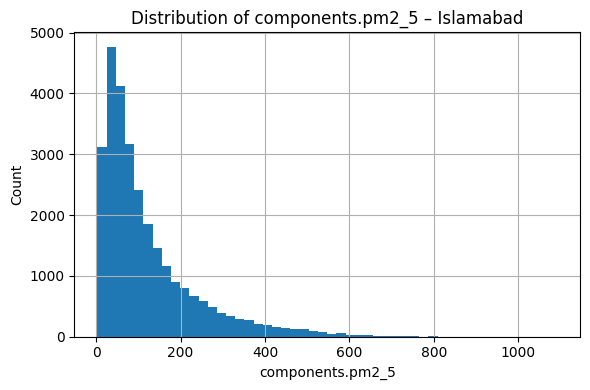

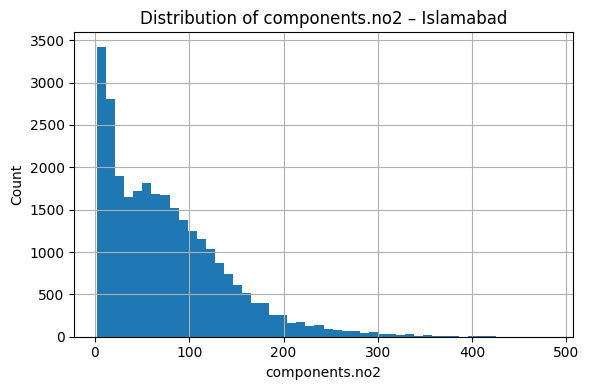

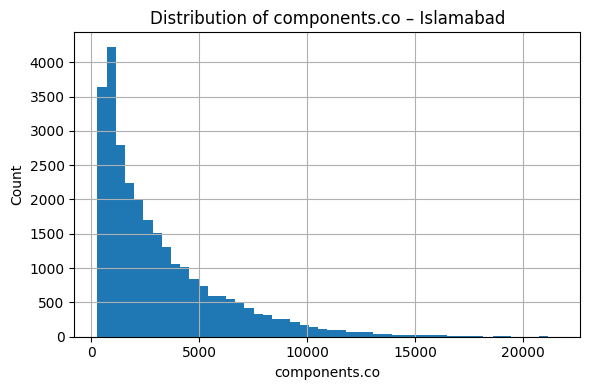

In [23]:
pollutant_cols = ["components.pm2_5", "components.no2", "components.co"]

for col in pollutant_cols:
    plt.figure(figsize=(6, 4))
    df_isb[col].replace(-200, np.nan).hist(bins=50)
    plt.title(f"Distribution of {col} – Islamabad")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


Load all 5 cities into one DataFrame

In [24]:
dfs = []
for city, fname in city_files.items():
    df_city = load_city_df(city, fname)
    dfs.append(df_city)

df_all = pd.concat(dfs, ignore_index=True)
df_all.head()


,datetime,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,surface_pressure,wind_speed_10m,wind_direction_10m,shortwave_radiation,city
0,2021-08-24 00:00:00,5,1228.33,0.00,27.76,40.41,6.02,66.96,87.07,14.69,29.7,55.0,19.7,0.0,943.4,10.5,74.0,0,islamabad
1,2021-08-24 01:00:00,5,1134.87,0.00,24.33,46.49,6.20,64.50,82.37,14.57,29.4,56.0,19.7,0.0,943.2,10.8,92.0,0,islamabad
2,2021-08-24 02:00:00,5,1361.85,0.94,39.41,30.76,6.91,64.21,80.38,16.21,28.9,58.0,19.8,0.0,943.0,10.1,107.0,0,islamabad
3,2021-08-24 03:00:00,5,1682.28,8.38,51.41,27.18,9.06,64.75,79.55,17.73,28.4,60.0,19.8,0.0,942.8,10.5,106.0,0,islamabad
4,2021-08-24 04:00:00,5,1054.76,3.07,27.08,91.55,21.70,59.86,71.18,13.30,28.1,62.0,20.1,0.0,942.9,9.4,97.0,0,islamabad


Quick check: rows per city

In [25]:
df_all["city"].value_counts()


city
lahore       28269
islamabad    28245
peshawar     28245
karachi      28221
quetta       28221
Name: count, dtype: int64

Compare daily PM2.5 across cities

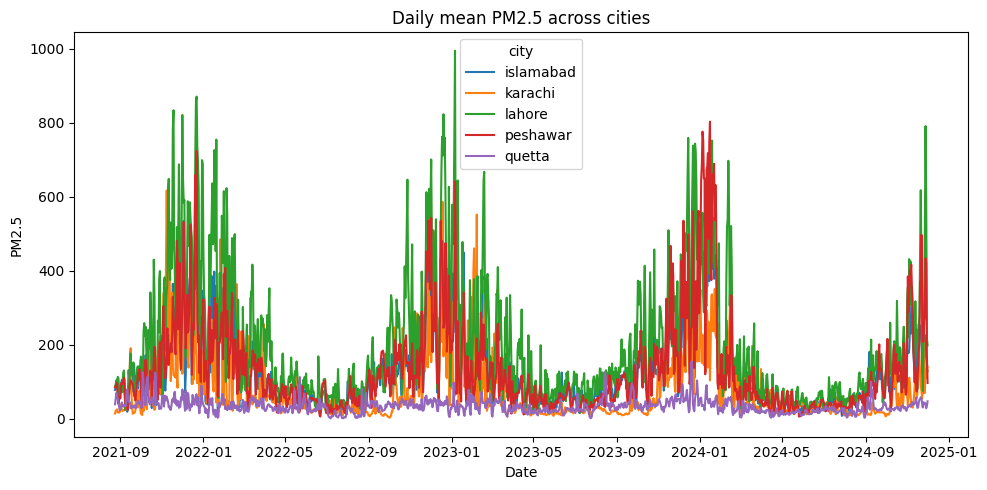

In [26]:
df_all_ts = df_all.set_index("datetime").sort_index()

daily_pm25 = (
    df_all_ts["components.pm2_5"]
    .replace(-200, np.nan)
    .groupby([df_all_ts["city"], df_all_ts.index.date])
    .mean()
)

daily_pm25_unstacked = daily_pm25.unstack(0)

plt.figure(figsize=(10, 5))
daily_pm25_unstacked.plot(ax=plt.gca())
plt.title("Daily mean PM2.5 across cities")
plt.ylabel("PM2.5")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


Correlation matrix

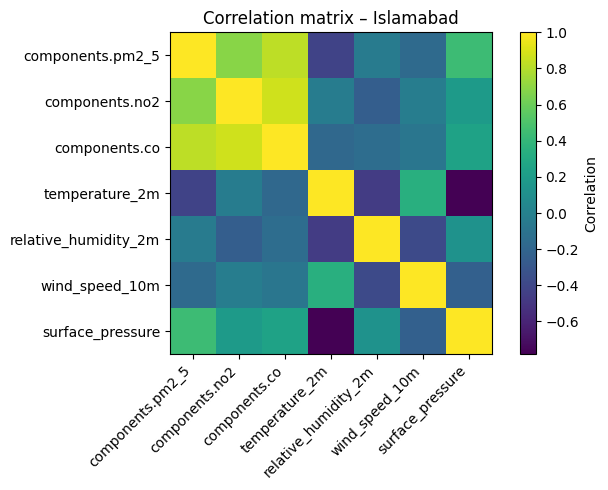

,components.pm2_5,components.no2,components.co,temperature_2m,relative_humidity_2m,wind_speed_10m,surface_pressure
components.pm2_5,1.000000,0.686662,0.823890,-0.425449,-0.041645,-0.167564,0.441135
components.no2,0.686662,1.000000,0.871759,-0.033839,-0.248543,-0.026646,0.187773
components.co,0.823890,0.871759,1.000000,-0.176843,-0.146057,-0.079366,0.242990
temperature_2m,-0.425449,-0.033839,-0.176843,1.000000,-0.463164,0.339527,-0.780316
relative_humidity_2m,-0.041645,-0.248543,-0.146057,-0.463164,1.000000,-0.380165,0.124779
wind_speed_10m,-0.167564,-0.026646,-0.079366,0.339527,-0.380165,1.000000,-0.237568
surface_pressure,0.441135,0.187773,0.242990,-0.780316,0.124779,-0.237568,1.000000


In [27]:
num_cols = [
    "components.pm2_5",
    "components.no2",
    "components.co",
    "temperature_2m",
    "relative_humidity_2m",
    "wind_speed_10m",
    "surface_pressure",
]

corr = (
    df_isb[num_cols]
    .replace(-200, np.nan)
    .corr()
)

plt.figure(figsize=(7, 5))
plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar(label="Correlation")
plt.title("Correlation matrix – Islamabad")
plt.tight_layout()
plt.show()

corr


Final summary

## EDA Summary – Pakistan Air Quality Dataset

**Main findings:**

- Each city file contains:
  - a `datetime` column,
  - overall air quality index (`main.aqi`),
  - individual pollutant components (`components.pm2_5`, `components.no2`, `components.co`, etc.),
  - meteorological variables (`temperature_2m`, `relative_humidity_2m`, `wind_speed_10m`, `surface_pressure`, etc.).

- Missing or invalid readings appear as both **NaN** and `-200`.
  The `-200` values clearly behave like sensor error codes and must be
  treated as missing during preprocessing (e.g. interpolation).

- Pollutant distributions (especially **PM2.5** and **NO2**) are positively skewed,
  with occasional extreme peaks that correspond to pollution spikes.

- Time-series analysis of daily mean PM2.5 shows strong temporal variation and
  clear differences between cities.

- Correlation analysis suggests relationships between pollutants and weather
  variables (e.g., humidity, temperature, wind speed), which can be exploited
  as features.

These observations justify the preprocessing design used in the project:
- replacing `-200` with interpolated values,
- resampling data onto a regular 1-minute grid,
- normalizing pollutant values before feeding them into the unified
  federated learning model.
